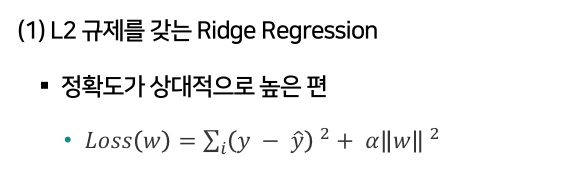

In [1]:
from IPython.display import Image
Image("img/img03_01.png", width=400)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

In [8]:
# Fetching the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the Ridge regression model
ridge = Ridge()

# Defining the parameter grid
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Initializing the GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# Fitting the GridSearchCV
grid_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

# Using the best estimator to predict on the test set
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(X_test)

# Calculating the R^2 score on the test set
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set:", r2)
mae = mean_absolute_error(y_test, y_pred)
mae

Best parameters: {'alpha': 0.0001}
Best R^2 score: 0.611483995255776
R^2 score on test set: 0.575787708845339


0.5332001297797733

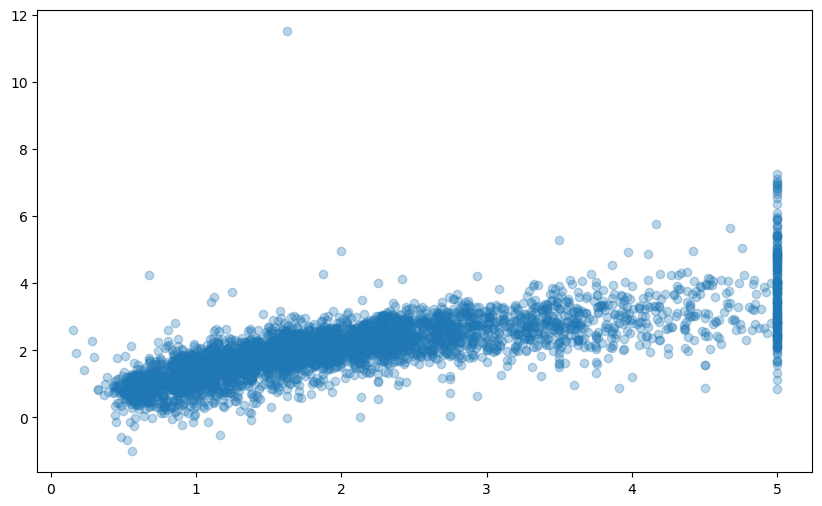

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred,alpha = 0.3)
plt.plot()
plt.show() 

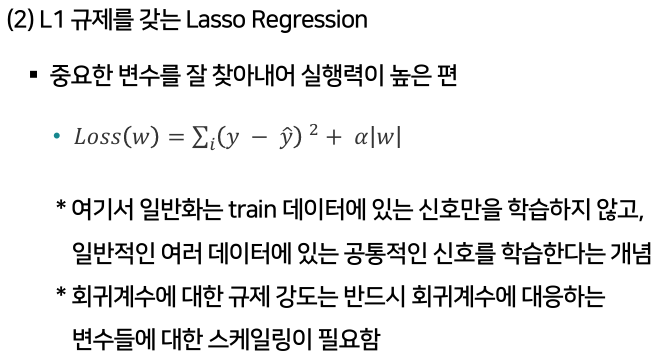

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_scoreImage("img/img03_02.png", width=400)

Best parameters: {'alpha': 0.0006551285568595509}
Best R^2 score: 0.6115034456562827
R^2 score on test set: 0.5765000760834784
Mean Absolute Error (MAE) on test set: 0.5331589179972245


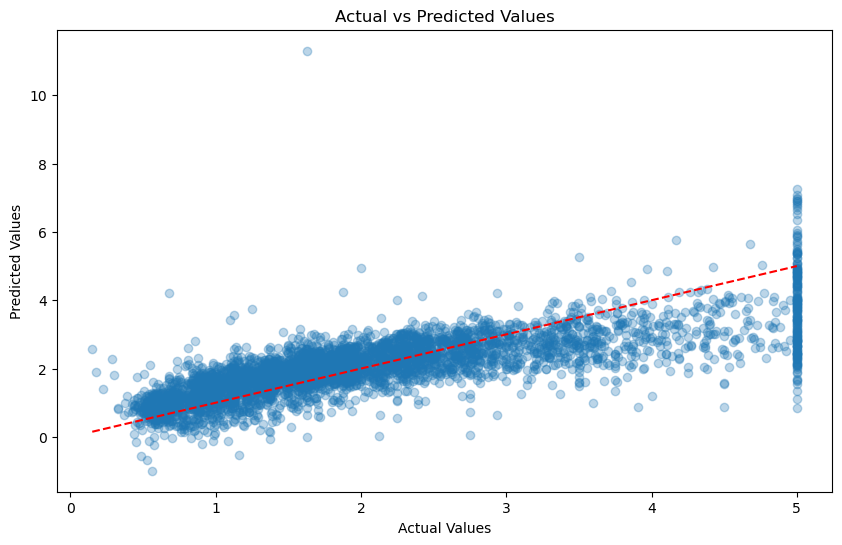

In [11]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Fetching the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the Lasso regression model
lasso = Lasso()

# Defining the parameter grid
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Initializing the GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')

# Fitting the GridSearchCV
grid_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

# Using the best estimator to predict on the test set
best_lasso = grid_search.best_estimator_
y_pred = best_lasso.predict(X_test)

# Calculating the R^2 score on the test set
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set:", r2)

# Calculating the Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on test set:", mae)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
